In [2]:
!pip install yfinance

import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")

tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
print(tesla_data.head())
tesla_data.to_csv('tesla_data.csv')


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/db/fc/10b7d339ccf6725e13408d76fb1e944f512590a949af426503c38d4af712/yfinance-0.2.41-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 9.8 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for html5lib>=1.1 from https://files.pythonhosted.org/packages/6c/dd/a834df6482147d48e225a49515aabc28974ad

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"


response = requests.get(url)
html_data = response.content
soup = BeautifulSoup(html_data, 'html.parser')
tables = pd.read_html(str(soup.find_all('table')[0]))
tesla_revenue = tables[0]


print(tesla_revenue.columns)
print(tesla_revenue.head())

Index(['Tesla Annual Revenue (Millions of US $)', 'Tesla Annual Revenue (Millions of US $).1'], dtype='object')
   Tesla Annual Revenue (Millions of US $)  \
0                                     2021   
1                                     2020   
2                                     2019   
3                                     2018   
4                                     2017   

  Tesla Annual Revenue (Millions of US $).1  
0                                   $53,823  
1                                   $31,536  
2                                   $24,578  
3                                   $21,461  
4                                   $11,759  


In [5]:
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace=True)


print(gme_data.head())
gme_data.to_csv('gme_data.csv')


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url_2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

response_2 = requests.get(url_2)
html_data_2 = response_2.content

soup_2 = BeautifulSoup(html_data_2, 'html.parser')
tables_2 = pd.read_html(str(soup_2.find_all('table')[1]))
gme_revenue = tables_2[0]


print(gme_revenue.columns)
gme_revenue.columns = ['Date', 'Revenue']

gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$',"", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]


print(gme_revenue.tail())
gme_revenue.to_csv('gme_revenue.csv')


Index(['GameStop Quarterly Revenue (Millions of US $)', 'GameStop Quarterly Revenue (Millions of US $).1'], dtype='object')
          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


Index(['Tesla Annual Revenue (Millions of US $)', 'Tesla Annual Revenue (Millions of US $).1'], dtype='object')
   Tesla Annual Revenue (Millions of US $)  \
0                                     2021   
1                                     2020   
2                                     2019   
3                                     2018   
4                                     2017   

  Tesla Annual Revenue (Millions of US $).1  
0                                   $53,823  
1                                   $31,536  
2                                   $24,578  
3                                   $21,461  
4                                   $11,759  


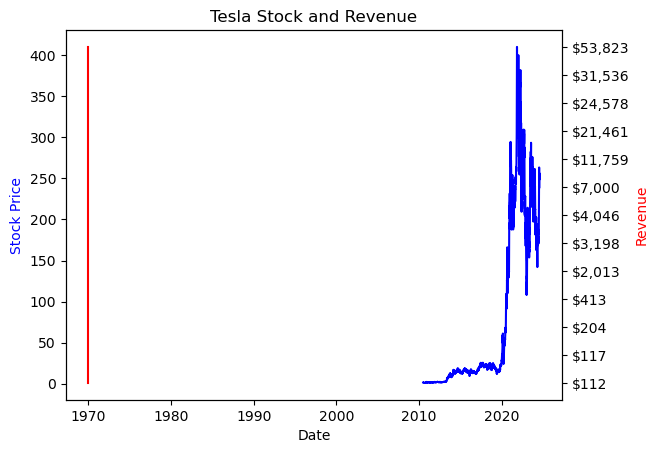

In [9]:
print(tesla_revenue.columns)
print(tesla_revenue.head())

tesla_revenue.columns = ['Date', 'Revenue']

import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots()

    ax1.plot(stock_data['Date'], stock_data['Close'], 'b-')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='b')

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], 'r-')
    ax2.set_ylabel('Revenue', color='r')

    plt.title(title)
    plt.show()

tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

tesla_data.sort_values('Date', inplace=True)
tesla_revenue.sort_values('Date', inplace=True)

make_graph(tesla_data, tesla_revenue, 'Tesla Stock and Revenue')

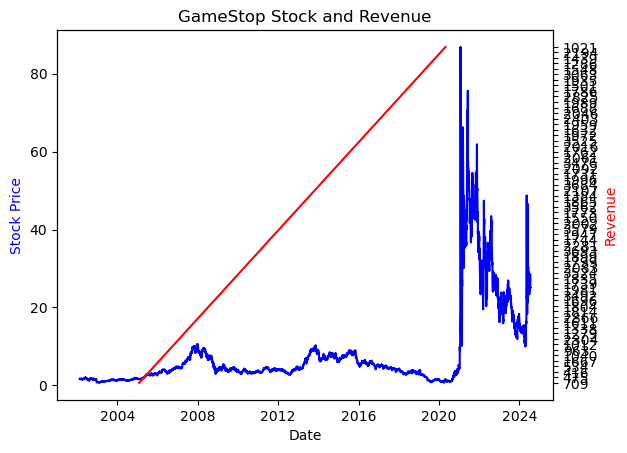

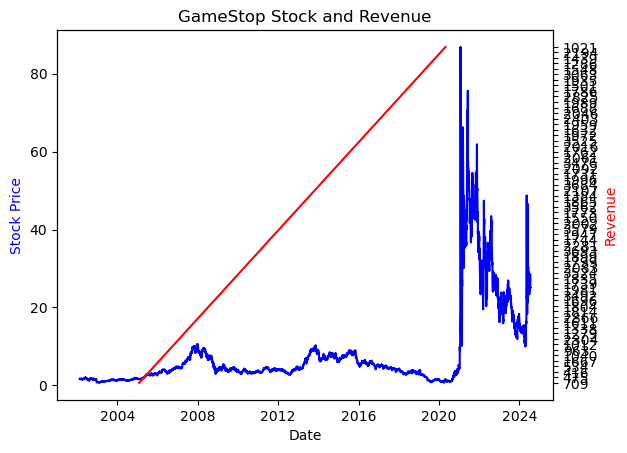

In [13]:
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

gme_data.sort_values('Date', inplace=True)
gme_revenue.sort_values('Date', inplace=True)

make_graph(gme_data, gme_revenue, 'GameStop Stock and Revenue')

import matplotlib.pyplot as plt
import pandas as pd

def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots()

    ax1.plot(stock_data['Date'], stock_data['Close'], 'b-')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='b')

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], 'r-')
    ax2.set_ylabel('Revenue', color='r')

    plt.title(title)
    plt.show()

gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])


gme_data.sort_values('Date', inplace=True)
gme_revenue.sort_values('Date', inplace=True)

make_graph(gme_data, gme_revenue, 'GameStop Stock and Revenue')
